In [37]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data_file = os.path.join("clean_df.csv")
raw_data = pd.read_csv(data_file)
raw_data.drop(columns="Unnamed: 0", inplace=True)

In [48]:
# Filter out true values for all teams except for blackhawks
team_filter = raw_data[(raw_data["Bulls"] == False)&(raw_data["Cubs"] == False)&
                    (raw_data["Bears"] == False)&(raw_data["White Sox"] == False)]

# Filter CTA stations by stations near the United Center
ashland_stop = team_filter.loc[team_filter["station_id"]== 40170]
il_med_dist_stop = team_filter.loc[team_filter["station_id"]== 40810]
uc_stations_data = ashland_stop.append(il_med_dist_stop)

In [13]:
# Ridership on non-game days
no_game_filter = uc_stations_data[uc_stations_data["Blackhawks"]==False]
no_game_group = no_game_filter.groupby(["daytype",])
no_games_avg = no_game_group[["daytype","rides"]].agg("mean")
no_games_avg

,rides
daytype,
A,769.358209
U,518.897436
W,1960.217290


In [15]:
games_uc = uc_stations_data[uc_stations_data["Blackhawks"]==True]
games_group = games_uc.groupby(["daytype"])
games_avg = games_group[["daytype","rides"]].agg("mean")
games_avg

,rides
daytype,
A,1134.583333
U,722.352941
W,2642.028846


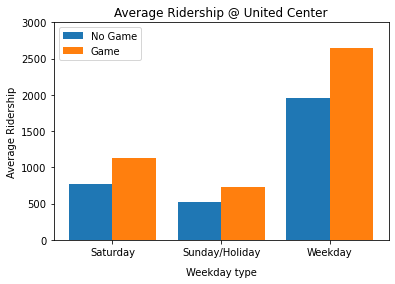

In [47]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
w = 0.4
x = no_games_avg.index
labels = ["Saturday", "Sunday/Holiday", "Weekday"]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,no_games_avg["rides"],w,label="No Game")
plt.bar(bar2,games_avg["rides"],w,label="Game")
plt.xticks(bar1+w/2,labels)

# labels
plt.title("Average Ridership @ United Center")
plt.ylabel("Average Ridership")
plt.xlabel("Weekday type", labelpad=10)
plt.ylim(0,3000)
plt.legend()
plt.show()